In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [77]:
TotalDataset = pd.read_csv('/content/drive/MyDrive/EEG data/final_merged_normalised.csv')
TotalDataset.drop('Unnamed: 0', inplace=True, axis=1)
TotalDataset

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,label
0,0.825994,0.366363,0.352864,0.385786,0.484617,0.529064,0.492561,0.825758,0.482860,0.437206,0.409282,0.337509,0.666438,0.407050,0.753454,0.450400,0.475402,0.490362,0.448199,0.650889,0.521872,0.790838,0.489738,0.488114,0.530116,0.571143,0.524179,0.643074,0.800276,0.602199,0.598072,0.630369,0.394004,0.444099,0.417197,0.802965,0.490383,0.506594,0.494154,0.517420,...,0.001365,0.007923,0.001856,0.009142,0.003888,0.000377,0.000715,0.001422,0.007888,0.001928,0.009133,0.003862,0.000400,0.000823,0.001392,0.008090,0.001809,0.008866,0.003885,0.000379,0.000858,0.001326,0.008117,0.001860,0.008966,0.003909,0.000370,0.000836,0.001369,0.008147,0.001878,0.009106,0.003964,0.000406,0.000769,0.001327,0.007898,0.001853,0.009643,0.0
1,0.826155,0.365920,0.354309,0.386692,0.480345,0.530119,0.489688,0.824600,0.482840,0.438450,0.409857,0.335696,0.667052,0.404445,0.751163,0.450300,0.478139,0.491421,0.441545,0.654449,0.518564,0.790210,0.489619,0.488500,0.531181,0.569101,0.521738,0.642004,0.797382,0.603167,0.598085,0.630001,0.395854,0.444355,0.413192,0.804096,0.491164,0.503146,0.491183,0.525585,...,0.001829,0.010978,0.002460,0.008711,0.006554,0.000816,0.001547,0.001920,0.011008,0.002644,0.008684,0.006767,0.000866,0.001625,0.001946,0.011245,0.002489,0.008365,0.006900,0.000856,0.001613,0.001889,0.011243,0.002413,0.008328,0.006763,0.000827,0.001538,0.001865,0.011092,0.002427,0.008753,0.006586,0.000825,0.001548,0.001817,0.010800,0.002511,0.009205,0.0
2,0.825912,0.365349,0.355073,0.391090,0.475791,0.524539,0.472219,0.822085,0.484043,0.438298,0.407219,0.338837,0.671489,0.435726,0.750512,0.450184,0.478520,0.492930,0.439447,0.650044,0.500032,0.792424,0.489025,0.489786,0.530496,0.563998,0.528782,0.646352,0.798959,0.604112,0.591978,0.629078,0.406955,0.434885,0.409396,0.809074,0.488504,0.506719,0.494266,0.513084,...,0.008239,0.041387,0.007233,0.039537,0.018451,0.004376,0.006348,0.008280,0.036769,0.011239,0.050016,0.022437,0.005071,0.007113,0.008446,0.040909,0.008297,0.042389,0.019040,0.004301,0.006027,0.008006,0.035939,0.009456,0.045776,0.020487,0.004594,0.006470,0.008037,0.038311,0.007968,0.048056,0.021863,0.004905,0.007142,0.007608,0.039601,0.009270,0.042256,0.0
3,0.824774,0.366857,0.352699,0.384680,0.486682,0.530889,0.502717,0.819640,0.485517,0.435930,0.405471,0.344256,0.668790,0.407324,0.749706,0.451189,0.476815,0.489902,0.447172,0.653318,0.511725,0.788709,0.490095,0.488505,0.529913,0.571274,0.524738,0.632952,0.795886,0.605230,0.593682,0.625870,0.407639,0.444844,0.418021,0.801893,0.492828,0.500922,0.487259,0.533985,...,0.008626,0.041587,0.009147,0.043530,0.024546,0.005424,0.007232,0.009178,0.042448,0.009975,0.047879,0.024349,0.005409,0.007398,0.009036,0.042781,0.009267,0.046551,0.023316,0.005066,0.007073,0.008311,0.040823,0.008784,0.041567,0.025179,0.005379,0.007365,0.008487,0.042824,0.008526,0.040031,0.027017,0.005893,0.007741,0.009241,0.044650,0.008564,0.041237,0.0
4,0.826936,0.365539,0.354484,0.387966,0.478637,0.528828,0.488950,0.824023,0.482675,0.438879,0.411522,0.334459,0.665754,0.402870,0.748812,0.451633,0.476795,0.488570,0.449147,0.657396,0.524923,0.793211,0.488859,0.489229,0.531279,0.564247,0.522979,0.636083,0.799592,0.602839,0.597316,0.628695,0.396743,0.445403,0.410863,0.802778,0.492537,0.502532,0.485075,0.531449,...,0.009849,0.044937,0.012251,0.054022,0.022315,0.005146,0.007932,0.008851,0.042924,0.010301,0.045930,0.024510,0.005505,0.008169,0.009445,0.044781,0.010670,0.048382,0.022440,0.005130,0.008069,0.008959,0.043478,0.010521,0.047238,0.025368,0.005843,0.008667,0.010556,0.048217,0.011795,0.058242,0.028197,0.006219,0.008855,0.009781,0.048380,0.010130,0.050579,0.0

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
X = TotalDataset[['0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x',	'17_x',	'18_x',	'19_x',	'20_x',	'21_x',	'22_x',	'23_x',	'24_x',	'25_x',	'26_x',	'27_x',	'28_x',	'29_x',	'30_x',	'31_x',	'32_x',	'33_x',	'34_x','35_x','36_x',	'37_x',	'38_x',	'39_x',	'40_x',	'41_x',	'42_x',	'43_x',	'44_x',	'45_x',	'46_x',	'47_x',	'48_x',	'0_y',	'1_y',	'2_y',	'3_y',	'4_y',	'5_y',	'6_y',	'7_y',	'8_y',	'9_y',	'10_y',	'11_y',	'12_y',	'13_y',	'14_y',	'15_y',	'16_y',	'17_y',	'18_y',	'19_y',	'20_y',	'21_y',	'22_y',	'23_y',	'24_y',	'25_y',	'26_y',	'27_y',	'28_y',	'29_y',	'30_y',	'31_y',	'32_y',	'33_y',	'34_y', '35_y',	'36_y',	'37_y',	'38_y',	'39_y',	'40_y',	'41_y',	'42_y',	'43_y',	'44_y',	'45_y',	'46_y',	'47_y',	'48_y']]
y = TotalDataset[['label']]
X = np.asarray(X)
y = np.asarray(y)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


# **Apply Machine Learning for classification**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [82]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

In [83]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

In [84]:
clf_score=[]
for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  clf_score.append([score,name])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [85]:
clf_score

[[1.0, 'Nearest Neighbors'],
 [0.9942112879884226, 'Linear SVM'],
 [0.9985528219971056, 'Gaussian Process'],
 [0.9826338639652678, 'Decision Tree'],
 [0.9956584659913169, 'Random Forest'],
 [0.9913169319826338, 'AdaBoost'],
 [0.9667149059334298, 'Naive Bayes']]

In [86]:
clf_score = np.array(clf_score)
print(clf_score[:,0:-1])

[['1.0']
 ['0.9942112879884226']
 ['0.9985528219971056']
 ['0.9826338639652678']
 ['0.9956584659913169']
 ['0.9913169319826338']
 ['0.9667149059334298']]


In [87]:
b = np.array(names)
print(b)

['Nearest Neighbors' 'Linear SVM' 'Gaussian Process' 'Decision Tree'
 'Random Forest' 'AdaBoost' 'Naive Bayes']


In [88]:
from itertools import chain
flatten_list = list(chain.from_iterable(clf_score[:,0:-1]))
flatten_list

['1.0',
 '0.9942112879884226',
 '0.9985528219971056',
 '0.9826338639652678',
 '0.9956584659913169',
 '0.9913169319826338',
 '0.9667149059334298']

In [89]:
flatten_list = list(map(float, flatten_list))
flatten_list

[1.0,
 0.9942112879884226,
 0.9985528219971056,
 0.9826338639652678,
 0.9956584659913169,
 0.9913169319826338,
 0.9667149059334298]

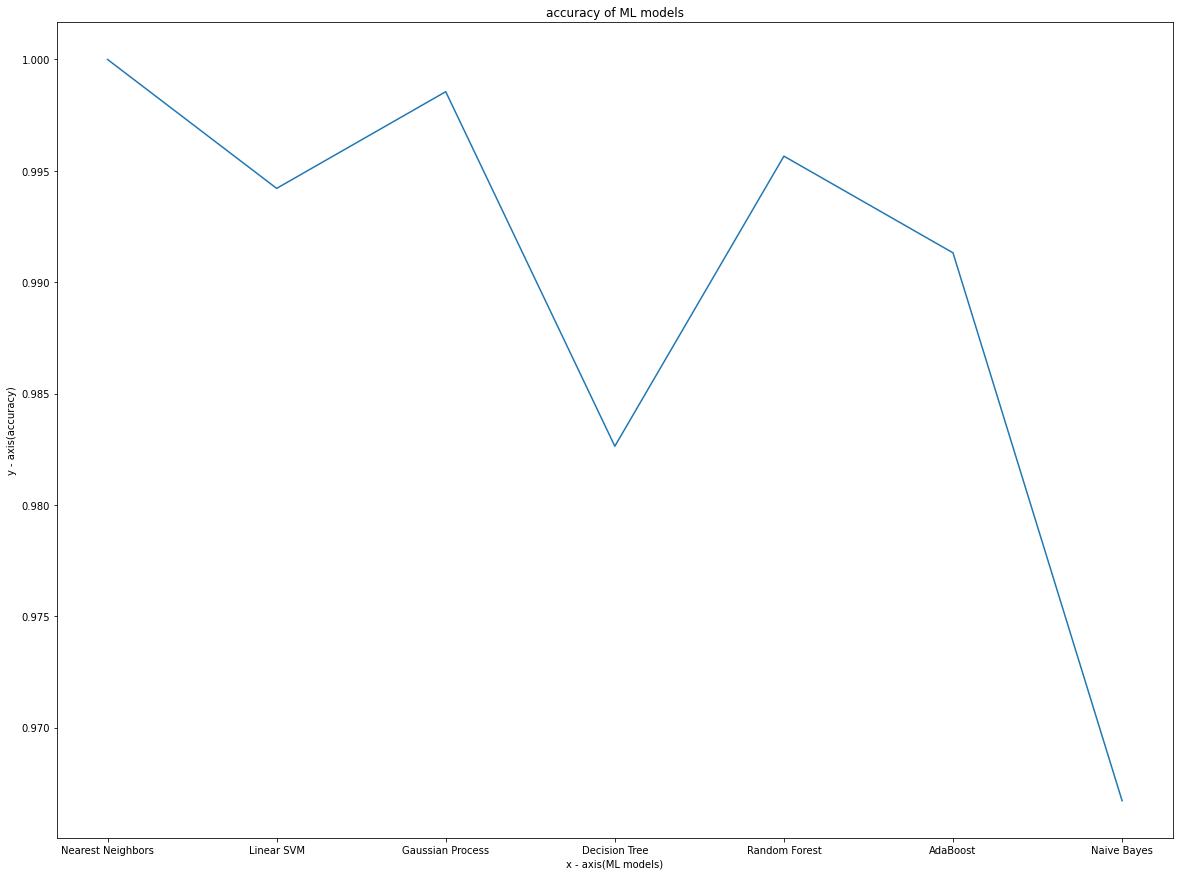

In [90]:
import matplotlib.pyplot as plt 
plt.subplots(figsize=(20,15))
x = b
#y = [0.9982456140350877,0.7719298245614035,0.9982456140350877,0.9894736842105263,0.9982456140350877,0.9964912280701754,0.987719298245614]
y=flatten_list
plt.plot(x, y) 
plt.xlabel('x - axis(ML models)') 
plt.ylabel('y - axis(accuracy)') 
plt.title('accuracy of ML models') 
plt.show() 

In [91]:
from numpy import genfromtxt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


TN = 536 FP = 0 FN = 0 TP = 155


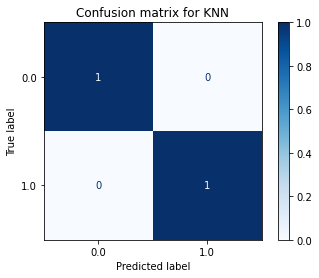

In [92]:
classifier = KNeighborsClassifier(3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for KNN')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [93]:
print('\nClassification Report for KNN\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for KNN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       155

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



TN = 533 FP = 3 FN = 1 TP = 154


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


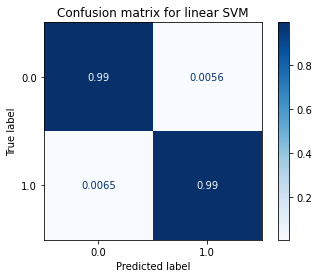

In [94]:
classifier = SVC(kernel="linear", C=0.025)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for linear SVM')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [95]:
print('\nClassification Report for SVM\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for SVM

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       536
         1.0       0.98      0.99      0.99       155

    accuracy                           0.99       691
   macro avg       0.99      0.99      0.99       691
weighted avg       0.99      0.99      0.99       691



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TN = 535 FP = 1 FN = 0 TP = 155


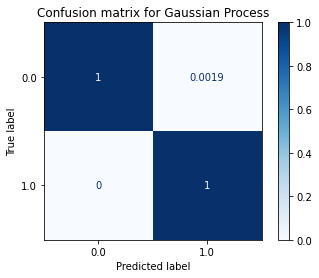

In [96]:
classifier = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for Gaussian Process')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [97]:
print('\nClassification Report for Gaussian Process\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for Gaussian Process

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       0.99      1.00      1.00       155

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



TN = 530 FP = 6 FN = 5 TP = 150


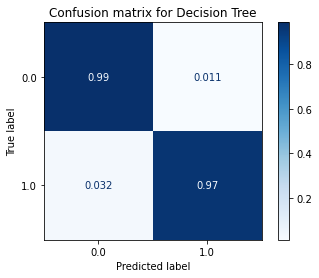

In [98]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for Decision Tree')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [99]:
print('\nClassification Report for Decision Tree\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for Decision Tree

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       536
         1.0       0.96      0.97      0.96       155

    accuracy                           0.98       691
   macro avg       0.98      0.98      0.98       691
weighted avg       0.98      0.98      0.98       691



TN = 532 FP = 4 FN = 2 TP = 153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


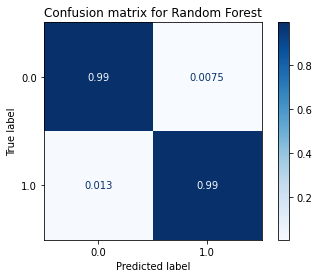

In [100]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for Random Forest')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [101]:
print('\nClassification Report for Random Forest\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for Random Forest

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       536
         1.0       0.97      0.99      0.98       155

    accuracy                           0.99       691
   macro avg       0.99      0.99      0.99       691
weighted avg       0.99      0.99      0.99       691



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TN = 532 FP = 4 FN = 2 TP = 153


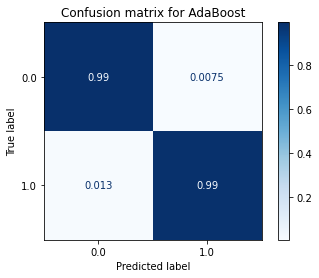

In [102]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for AdaBoost')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [103]:
print('\nClassification Report for AdaBoost\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for AdaBoost

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       536
         1.0       0.97      0.99      0.98       155

    accuracy                           0.99       691
   macro avg       0.99      0.99      0.99       691
weighted avg       0.99      0.99      0.99       691



TN = 513 FP = 23 FN = 0 TP = 155


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


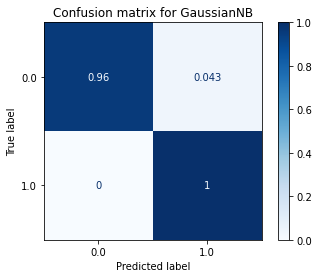

In [104]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

matrix = plot_confusion_matrix(classifier,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix for GaussianNB')
confusion = confusion_matrix(y_test, y_pred)
confusion= confusion.flatten()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#(tn, fp, fn, tp)
print("TN =",tn,"FP =",fp,"FN =",fn,"TP =",tp)

In [105]:
print('\nClassification Report for GaussianNB\n')
print(classification_report(y_test, y_pred, target_names=['0.0', '1.0']))


Classification Report for GaussianNB

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       536
         1.0       0.87      1.00      0.93       155

    accuracy                           0.97       691
   macro avg       0.94      0.98      0.95       691
weighted avg       0.97      0.97      0.97       691

